In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import statsmodels.api as sm

In [2]:
import matplotlib.pyplot as plt

## One Hot Encoding

In [55]:
dataset=pd.read_csv('data/StartUps.csv')
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [56]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [57]:
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,4].values

In [58]:
labelencoder_X=LabelEncoder()
X[:,3]=labelencoder_X.fit_transform(X[:,3])
print("After encoding 'State' feature columns looks like:")
X.shape

After encoding 'State' feature columns looks like:


(50, 4)

In [59]:
oneHotEncoder=OneHotEncoder()
mat=oneHotEncoder.fit_transform(X[:,3].reshape(-1,1)).toarray()

In [61]:
X=np.hstack([X[:,:-1],mat])
X

array([[165349.2, 136897.8, 471784.1, 0.0, 0.0, 1.0],
       [162597.7, 151377.59, 443898.53, 1.0, 0.0, 0.0],
       [153441.51, 101145.55, 407934.54, 0.0, 1.0, 0.0],
       [144372.41, 118671.85, 383199.62, 0.0, 0.0, 1.0],
       [142107.34, 91391.77, 366168.42, 0.0, 1.0, 0.0],
       [131876.9, 99814.71, 362861.36, 0.0, 0.0, 1.0],
       [134615.46, 147198.87, 127716.82, 1.0, 0.0, 0.0],
       [130298.13, 145530.06, 323876.68, 0.0, 1.0, 0.0],
       [120542.52, 148718.95, 311613.29, 0.0, 0.0, 1.0],
       [123334.88, 108679.17, 304981.62, 1.0, 0.0, 0.0],
       [101913.08, 110594.11, 229160.95, 0.0, 1.0, 0.0],
       [100671.96, 91790.61, 249744.55, 1.0, 0.0, 0.0],
       [93863.75, 127320.38, 249839.44, 0.0, 1.0, 0.0],
       [91992.39, 135495.07, 252664.93, 1.0, 0.0, 0.0],
       [119943.24, 156547.42, 256512.92, 0.0, 1.0, 0.0],
       [114523.61, 122616.84, 261776.23, 0.0, 0.0, 1.0],
       [78013.11, 121597.55, 264346.06, 1.0, 0.0, 0.0],
       [94657.16, 145077.58, 282574.31, 0.

## Linear Regression

In [3]:
co2=pd.read_csv('data/FuelConsumptionCo2.csv')
co2.head(10)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
5,2014,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
6,2014,ACURA,TL,MID-SIZE,3.5,6,AS6,Z,11.8,8.1,10.1,28,232
7,2014,ACURA,TL AWD,MID-SIZE,3.7,6,AS6,Z,12.8,9.0,11.1,25,255
8,2014,ACURA,TL AWD,MID-SIZE,3.7,6,M6,Z,13.4,9.5,11.6,24,267
9,2014,ACURA,TSX,COMPACT,2.4,4,AS5,Z,10.6,7.5,9.2,31,212


In [318]:
co2.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [7]:
df=co2[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]

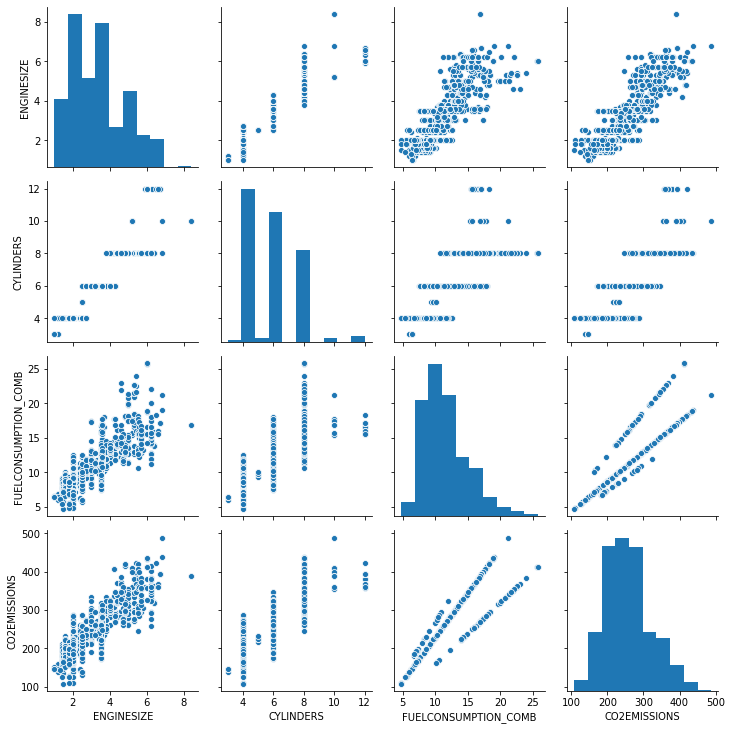

In [8]:
sns.pairplot(df)

In [233]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest=train_test_split(df.iloc[:,:-1].values,df.CO2EMISSIONS.values,test_size=0.2,random_state=42)

In [234]:
df.iloc[:,:-1]

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB
0,2.0,4,8.5
1,2.4,4,9.6
2,1.5,4,5.9
3,3.5,6,11.1
4,3.5,6,10.6
...,...,...,...
1062,3.0,6,11.8
1063,3.2,6,11.5
1064,3.0,6,11.8
1065,3.2,6,11.3


In [235]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

#### Cross Validation using cross_val_score

In [267]:
from sklearn.model_selection import cross_val_score
neg_mse=cross_val_score(model,Xtrain,ytrain,cv=10,scoring='neg_mean_squared_error')
r2=cross_val_score(model,Xtrain,ytrain,cv=10,scoring='r2')
rmse=np.sqrt(-neg_mse)
print(rmse.mean(),rmse.std())
print(r2.mean())

23.36102149846793 2.0195895417615652
0.857148315779963


#### Final Performance of the model on testing data

In [236]:
model.fit(Xtrain,Ytrain)

LinearRegression()

In [237]:
model.coef_

array([11.2094395 ,  7.15561381,  9.5208118 ])

In [238]:
model.intercept_

67.34838518362085

In [239]:
y=model.predict(Xtest)

In [240]:
from sklearn.metrics import r2_score,mean_squared_error
r2_score(Ytest,y)

0.875970520691407

In [241]:
np.sqrt(mean_squared_error(Ytest,y))

22.646305151499437

#### -------------------------------------------------------------------------------------------------------------------------------------------

### Feature Selection for regression_model

In [7]:
data=co2.iloc[:,[4,5,8,9,10,11,-1]]
data.corr()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
ENGINESIZE,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


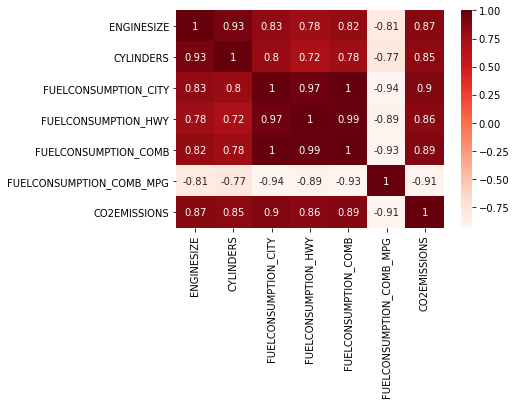

In [5]:
sns.heatmap(data.corr(),annot=True,cmap=plt.cm.Reds)

In [8]:
data=np.hstack([np.ones((data.shape[0],1)),data.values])

In [9]:
X=data[:,:-1]
y=data[:,-1]

In [10]:
X_val=X[:,[0,1,2,3,4,5,6]]

In [11]:
model=sm.OLS(y,X_val).fit()
model.pvalues

array([4.78118201e-78, 2.02301186e-09, 3.79013355e-13, 3.94696701e-01,
       7.33744751e-01, 4.32684095e-01, 5.03654958e-49])

In [352]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     1419.
Date:                Thu, 22 Apr 2021   Prob (F-statistic):               0.00
Time:                        21:26:24   Log-Likelihood:                -4766.4
No. Observations:                1067   AIC:                             9547.
Df Residuals:                    1060   BIC:                             9582.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        253.5312     12.451     20.362      0.000     229.099     277.964
x1             8.5777      1.418      6.049      0.000       5.795      11.360
x2             7.6987      1.047      7.356      0.000       5.645       9.752
x3           -10.5926     12.440     -0.851      0.395     -35.003      13.818
x4            -3.4892     10.255     -0.340      0.734     -23.612      16.633
x5            17.7529     22.618      0.785      0.433     -26.628      62.134
x6            -3.8692      0.250    -15.505      0.000      -4.359      -3.380
==============================================================================
Omnibus:                       76.623   Durbin-Watson:                   1.654
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              347.468
Skew:                          -0.100   Prob(JB):                     3.53e-76
Kurtosis:                       5.788   Cond. No.                     1.46e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.46e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [361]:
X_val=X[:,[0,1,2,4,5,6]]
model=sm.OLS(y,X_val).fit()
model.pvalues

array([5.08575950e-78, 2.04005087e-09, 4.10798675e-13, 1.05083887e-03,
       3.45557077e-01, 5.81095831e-49])

In [362]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     1703.
Date:                Thu, 22 Apr 2021   Prob (F-statistic):               0.00
Time:                        21:30:44   Log-Likelihood:                -4766.8
No. Observations:                1067   AIC:                             9546.
Df Residuals:                    1061   BIC:                             9575.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        253.4080     12.449     20.356      0.000     228.980     277.835
x1             8.5745      1.418      6.047      0.000       5.792      11.357
x2             7.6849      1.046      7.345      0.000       5.632       9.738
x3             5.1406      1.565      3.286      0.001       2.071       8.211
x4            -1.4605      1.548     -0.944      0.346      -4.498       1.576
x5            -3.8649      0.249    -15.493      0.000      -4.354      -3.375
==============================================================================
Omnibus:                       76.623   Durbin-Watson:                   1.655
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              349.005
Skew:                          -0.095   Prob(JB):                     1.64e-76
Kurtosis:                       5.795   Cond. No.                         606.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
X_val=X[:,[0,1,2,5,6]]
model=sm.OLS(y,X_val).fit()
model.pvalues

array([6.10611443e-76, 6.24058498e-10, 3.48902072e-11, 4.46341702e-10,
       6.48234664e-47])

In [13]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     2107.
Date:                Fri, 23 Apr 2021   Prob (F-statistic):               0.00
Time:                        07:49:52   Log-Likelihood:                -4772.2
No. Observations:                1067   AIC:                             9554.
Df Residuals:                    1062   BIC:                             9579.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        244.6495     12.216     20.027      0.000     220.679     268.620
x1             8.8730      1.422      6.242      0.000       6.084      11.662
x2             6.8007      1.016      6.695      0.000       4.807       8.794
x3             3.3228      0.528      6.296      0.000       2.287       4.358
x4            -3.6307      0.240    -15.118      0.000      -4.102      -3.160
==============================================================================
Omnibus:                       79.089   Durbin-Watson:                   1.653
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              354.543
Skew:                          -0.145   Prob(JB):                     1.03e-77
Kurtosis:                       5.809   Cond. No.                         566.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
X=X[:,1:]

In [19]:
y

array([196., 221., 136., ..., 271., 260., 294.])

In [24]:
#X=co2.iloc[:,[4,5,8,9,10,11]]
#y=co2.iloc[:,-1]
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [25]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2)

#### Cross Validation using cross_val_score

In [26]:
from sklearn.model_selection import cross_val_score
neg_mse=cross_val_score(model,Xtrain,ytrain,cv=10,scoring='neg_mean_squared_error')
r2=cross_val_score(model,Xtrain,ytrain,cv=10,scoring='r2')
rmse=np.sqrt(-neg_mse)
print(rmse.mean(),rmse.std())
print(r2.mean())

22.064175763025702 1.800085765924727
0.8799910938815279


### Final Performance of the model on testing data

In [27]:
model.fit(Xtrain,ytrain)

LinearRegression()

In [28]:
ytest_pred=model.predict(Xtest)

In [32]:
from sklearn.metrics import r2_score,mean_squared_error
r2_score(ytest,ytest_pred)

0.9139703788924345

In [33]:
np.sqrt(mean_squared_error(ytest,ytest_pred))

17.356517480431595

## Logistic Regression

### Binary Classification 

In [3]:
iris=sns.load_dataset('iris')

In [35]:
iris_set=iris[~(iris['species']=='setosa')]

In [36]:
X=iris_set.iloc[:,:-1]
y=iris_set.iloc[:,[-1]]

In [37]:
X=X.values
y=y.values

In [38]:
mask=(y=='versicolor')
y[mask]=0
y[~mask]=1

In [39]:
y=y.astype('int')

In [40]:
y=y.reshape(-1)

In [41]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.3)

In [42]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(fit_intercept=True)

In [43]:
model.fit(Xtrain,ytrain)

LogisticRegression()

In [44]:
ycap=model.predict(Xtest)

In [45]:
res=(ycap==ytest)
(res.sum())/res.size

0.8666666666666667

In [46]:
model.predict_proba(Xtest)

array([[0.99229026, 0.00770974],
       [0.40954135, 0.59045865],
       [0.14106853, 0.85893147],
       [0.96206821, 0.03793179],
       [0.99744863, 0.00255137],
       [0.86075291, 0.13924709],
       [0.61716687, 0.38283313],
       [0.00449139, 0.99550861],
       [0.07736145, 0.92263855],
       [0.84167328, 0.15832672],
       [0.09188807, 0.90811193],
       [0.37158605, 0.62841395],
       [0.19026301, 0.80973699],
       [0.95384359, 0.04615641],
       [0.97020981, 0.02979019],
       [0.06069998, 0.93930002],
       [0.97539963, 0.02460037],
       [0.14398291, 0.85601709],
       [0.59335907, 0.40664093],
       [0.37158605, 0.62841395],
       [0.82198954, 0.17801046],
       [0.24249851, 0.75750149],
       [0.99863186, 0.00136814],
       [0.9843849 , 0.0156151 ],
       [0.85115111, 0.14884889],
       [0.0062448 , 0.9937552 ],
       [0.05048082, 0.94951918],
       [0.42530956, 0.57469044],
       [0.1183072 , 0.8816928 ],
       [0.52998809, 0.47001191]])

In [47]:
model.coef_

array([[ 0.14186247, -0.16879368,  2.64246905,  1.87952562]])

In [48]:
model.intercept_

array([-16.88933159])

In [49]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,ycap)

0.8666666666666667

In [50]:
from sklearn.model_selection import cross_val_score
cross_val_score(model,Xtrain,ytrain).mean()

0.9285714285714286

In [51]:
from sklearn.model_selection import cross_val_predict
ytrain_pred=cross_val_predict(model,Xtrain,ytrain,cv=3)

In [52]:
ytrain_pred

array([0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1])

In [53]:
from sklearn.metrics import confusion_matrix
confusion_matrix(ytrain,ytrain_pred)

array([[37,  2],
       [ 4, 27]], dtype=int64)

In [54]:
from sklearn.metrics import precision_score,recall_score
print(precision_score(ytrain,ytrain_pred))
print(recall_score(ytrain,ytrain_pred))

0.9310344827586207
0.8709677419354839


In [55]:
from sklearn.metrics import f1_score
f1_score(ytrain,ytrain_pred)

0.9

In [59]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds=roc_curve(ytrain,ytrain_pred)
fpr1,tpr1,thresh=roc_curve(ytrain,ytrain_pred)

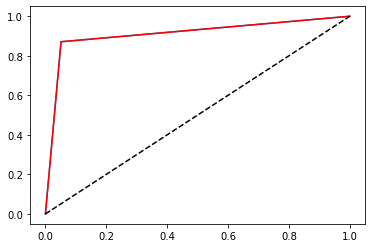

In [60]:
plt.plot(fpr,tpr)
plt.plot(fpr1,tpr1,color='red')
plt.plot([0,1],[0,1],'k--')
plt.show()

### Multinomial Classification

In [18]:
iris['species'].replace(['setosa','versicolor','virginica'],[0,1,2],inplace=True)

In [19]:
X=iris.iloc[:,:-1]
y=iris.iloc[:,-1]

In [21]:
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.3,random_state=42)

In [26]:
mod=LogisticRegression()

In [27]:
mod.fit(Xtrain,ytrain)

LogisticRegression()

In [28]:
ycap=mod.predict(Xtest)

In [ ]:
mod

In [35]:
cm=confusion_matrix(ytest,ycap)
cm

array([[19,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 13]], dtype=int64)

In [ ]:
f1_score(ytest,ycap,average=None)

In [317]:
f1_score(ytest,ycap,average=None)

array([1., 1., 1.])

In [237]:
from sklearn.preprocessing import StandardScaler

In [286]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [288]:
pd.DataFrame(X_scaled.astype('float'),columns=Xtrain.columns).describe()

,sepal_length,sepal_width,petal_length,petal_width
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-2.775558e-16,-9.695948e-16,-8.652338e-16,-4.662937e-16
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.433947e+00,-1.567576e+00,-1.447076e+00
25%,-9.006812e-01,-5.923730e-01,-1.226552e+00,-1.183812e+00
50%,-5.250608e-02,-1.319795e-01,3.364776e-01,1.325097e-01
75%,6.745011e-01,5.586108e-01,7.627583e-01,7.906707e-01
max,2.492019e+00,3.090775e+00,1.785832e+00,1.712096e+00


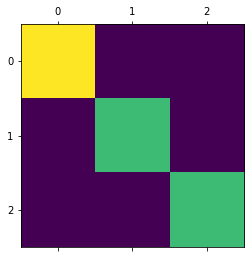

In [36]:
plt.matshow(cm)

In [33]:
plt.cm?

## Decision Trees

In [39]:
X=iris.iloc[:,:-1]
y=iris.iloc[:,-1]

In [40]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.3)

In [41]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(max_depth=3)

In [42]:
from sklearn.model_selection import cross_val_predict
ytrain_cap=cross_val_predict(dtree,Xtrain,ytrain,cv=5)

In [43]:
dtree.fit(Xtrain,ytrain)

DecisionTreeClassifier(max_depth=3)

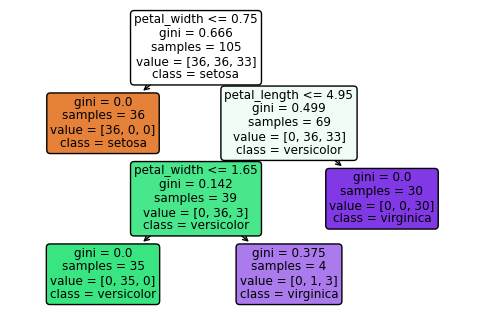

In [44]:
from sklearn import tree
plt.subplots(dpi=100)
tree.plot_tree(dtree,feature_names = X.columns,class_names=y.unique(),rounded=True,filled = True);

In [82]:
ycap=dtree.predict(Xtest)

In [87]:
from sklearn.metrics import f1_score,accuracy_score,confusion_matrix
print(accuracy_score(ytrain,ytrain_cap))
print(f1_score(ytrain,ytrain_cap,average=None))

0.9714285714285714
[1.         0.95384615 0.95774648]


In [88]:
confusion_matrix(ytrain,ytrain_cap)

array([[37,  0,  0],
       [ 0, 31,  2],
       [ 0,  1, 34]], dtype=int64)

## Support Vector Machines

SVM Classifier is very sensitive to scales. The data must be scaled using StandardScaler() before training the model for better performance.

In [3]:
ads=pd.read_csv('data/Social_Network_Ads.csv')
ads.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
ads.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [5]:
X=ads.iloc[:,2:-1]
y=ads.iloc[:,-1]

#### Scaling the Features

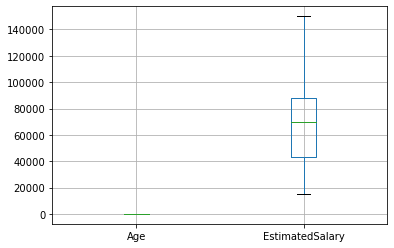

In [6]:
X.boxplot()

In [7]:
from sklearn.preprocessing import StandardScaler
X=StandardScaler().fit_transform(X)

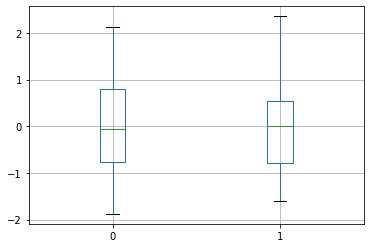

In [8]:
pd.DataFrame(X).boxplot()

#### Linear SVM classifier

In [25]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.3,random_state=42)

In [36]:
from sklearn.svm import SVC
svm_clf=SVC(kernel='linear',random_state=42)

In [37]:
svm_clf.fit(Xtrain,ytrain)

SVC(kernel='linear', random_state=42)

In [38]:
ytest_pred=svm_clf.predict(Xtest)

In [39]:
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix
print(accuracy_score(ytest,ytest_pred))
print(f1_score(ytest,ytest_pred))

0.85
0.7692307692307693


In [40]:
confusion_matrix(ytest,ytest_pred)

array([[72,  1],
       [17, 30]], dtype=int64)

## Naive Bayes

In [44]:
ads=pd.read_csv('data/Social_Network_Ads.csv')
X=ads.iloc[:,2:-1]
y=ads.iloc[:,-1]

In [47]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.3,random_state=42)

In [48]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()

In [49]:
model.fit(Xtrain,ytrain)

GaussianNB()

In [50]:
ypred=model.predict(Xtest)

In [53]:
from sklearn.metrics import f1_score,accuracy_score,confusion_matrix
print(accuracy_score(ytest,ypred))
print(f1_score(ytest,ypred))

0.925
0.896551724137931


For this dataset the Naive Bayes is performing better than SVM algorithm

In [3]:
pd.set_option('display.max_rows',None)

In [1]:
pd.read_csv()

NameError: name 'pd' is not defined

In [9]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures

X,y = make_moons(n_samples=100, noise=0.15)

ModuleNotFoundError: No module named 'scipy.io.matlab'

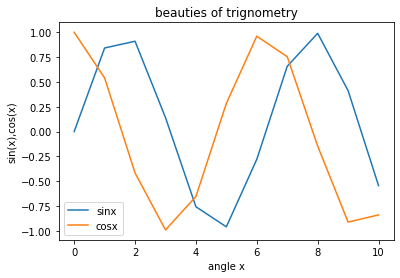

In [71]:
fig=plt.figure()
ax=plt.axes()
x=np.linspace(0,10,11)
y=np.sin(x)
y2=np.cos(x)
ax.plot(x,y1,label='sinx')
ax.plot(x,y2,label='cosx');
ax.set(xlabel='angle x',ylabel='sin(x),cos(x)',title='beauties of trignometry')
ax.legend();

In [72]:
x=np.arange(10)
y=np.arange(15)
xx,yy=np.meshgrid(x,y)

In [73]:
xx

array([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
       [ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
       [ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
       [ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
       [ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
       [ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
       [ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
       [ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
       [ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
       [ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
       [ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]])

In [74]:
yy

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.84147098,  0.84147098,  0.84147098,  0.84147098,  0.84147098,
         0.84147098,  0.84147098,  0.84147098,  0.84147098,  0.84147098,
         0.84147098],
       [ 0.90929743,  0.90929743,  0.90929743,  0.90929743,  0.90929743,
         0.90929743,  0.90929743,  0.90929743,  0.90929743,  0.90929743,
         0.90929743],
       [ 0.14112001,  0.14112001,  0.14112001,  0.14112001,  0.14112001,
         0.14112001,  0.14112001,  0.14112001,  0.14112001,  0.14112001,
         0.14112001],
       [-0.7568025 , -0.7568025 , -0.7568025 , -0.7568025 , -0.7568025 ,
        -0.7568025 , -0.7568025 , -0.7568025 , -0.7568025 , -0.7568025 ,
        -0.7568025 ],
       [-0.95892427, -0.95892427, -0.95892427, -0.95892427, -0.95892427,
        -0.95892427, -0.95892427, -0.95892427, -0.95892427, -0.95892427,
        -0.958

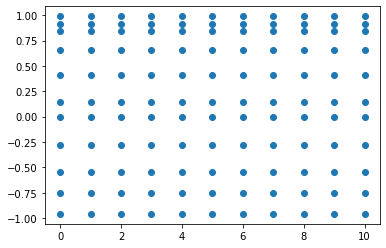

In [75]:
plt.scatter(xx,yy)

In [124]:
from sklearn.svm import LinearSVC

In [123]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [51]:
np.c_[np.array([3,4]),np.array([1,2])]

array([[3, 1],
       [4, 2]])

In [168]:
data=iris[(iris['species']!=2)].iloc[:,[2,3,-1]]

In [169]:
X=data.iloc[:,:-1]

In [170]:
y=data.iloc[:,-1]
y=y.replace(y.unique(),[0,1,2])

In [171]:
y.unique()

array([0, 1, 2], dtype=int64)

In [172]:
model=LinearSVC()

In [173]:
ind=X[y==2].index
X.drop(ind,inplace=True)

In [174]:
y=y[y!=2]

In [175]:
model.fit(X,y)

LinearSVC()

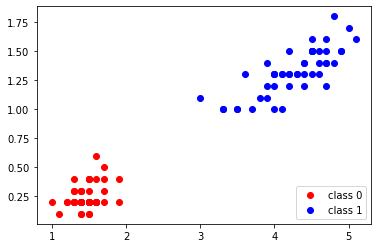

In [151]:
plt.figure()
plt.scatter(X[y==0].iloc[:,0],X[y==0].iloc[:,1],label='class 0',color='red')
plt.scatter(X[y==1].iloc[:,0],X[y==1].iloc[:,1],label='class 1',color='blue')
plt.legend(loc='lower right');

In [158]:
a_min,a_max=X.iloc[:,0].min()-1,X.iloc[:,0].max()+1
b_min,b_max=X.iloc[:,1].min()-1,X.iloc[:,1].max()+1

x=np.arange(a_min,a_max)
y=np.arange(b_min,b_max)
xx,yy=np.meshgrid(x,y)

X_2d=np.c_[xx.reshape(-1),yy.reshape(-1)]
y_2d=model.predict(X_2d)

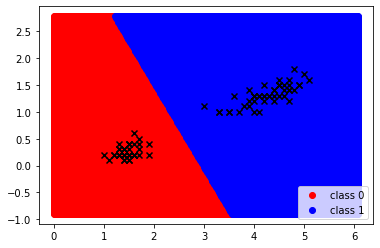

In [107]:
plt.figure()
plt.scatter(X_2d[y_2d==0][:,0],X_2d[y_2d==0][:,1],label='class 0',color='red')
plt.scatter(X_2d[y_2d==1][:,0],X_2d[y_2d==1][:,1],label='class 1',color='blue')
plt.scatter(X.iloc[:,0],X.iloc[:,1],marker='x',color='black')
plt.legend(loc='lower right');

In [176]:
def bound(m,x):
    return (-(m.coef_[0,0]*x)-m.intercept_[0])/m.coef_[0,1]

In [177]:
z=bound(model,x)

In [178]:
y

0     0
1     0
2     0
3     0
4     0
     ..
95    1
96    1
97    1
98    1
99    1
Name: species, Length: 100, dtype: int64

Text(0.5, 1.0, 'Decision Boundary of LinearSVC on Iris Dataset')

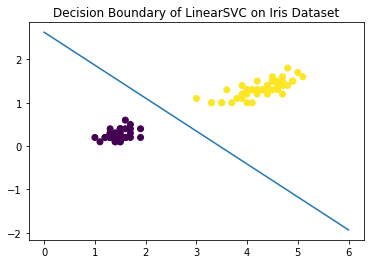

In [185]:
plt.figure()
plt.scatter(X.iloc[:,0],X.iloc[:,1],c=y)
plt.plot(x,z);
plt.title('Decision Boundary of LinearSVC on Iris Dataset')

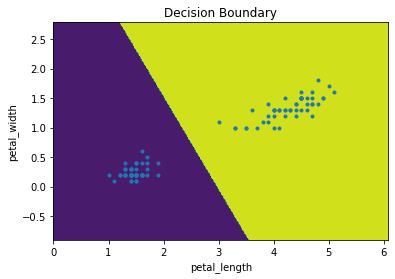

In [170]:
fig,ax=plt.subplots()
z=y_2d.reshape(xx.shape)
ax.contourf(xx,yy,z)
ax.scatter(X.iloc[:,0],X.iloc[:,1],marker='.')
ax.set(title='Decision Boundary', xlabel='petal_length', ylabel='petal_width');


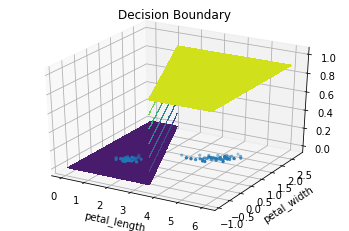

In [168]:
ax=plt.axes(projection='3d')
z=y_2d.reshape(xx.shape)
ax.contourf3D(xx,yy,z)
ax.scatter(X.iloc[:,0],X.iloc[:,1],marker='.')
ax.set(title='Decision Boundary', xlabel='petal_length', ylabel='petal_width');

In [92]:
xx

array([[0.  , 0.02, 0.04, ..., 6.04, 6.06, 6.08],
       [0.  , 0.02, 0.04, ..., 6.04, 6.06, 6.08],
       [0.  , 0.02, 0.04, ..., 6.04, 6.06, 6.08],
       ...,
       [0.  , 0.02, 0.04, ..., 6.04, 6.06, 6.08],
       [0.  , 0.02, 0.04, ..., 6.04, 6.06, 6.08],
       [0.  , 0.02, 0.04, ..., 6.04, 6.06, 6.08]])

In [93]:
yy

array([[-0.9 , -0.9 , -0.9 , ..., -0.9 , -0.9 , -0.9 ],
       [-0.88, -0.88, -0.88, ..., -0.88, -0.88, -0.88],
       [-0.86, -0.86, -0.86, ..., -0.86, -0.86, -0.86],
       ...,
       [ 2.74,  2.74,  2.74, ...,  2.74,  2.74,  2.74],
       [ 2.76,  2.76,  2.76, ...,  2.76,  2.76,  2.76],
       [ 2.78,  2.78,  2.78, ...,  2.78,  2.78,  2.78]])

In [175]:
%matplotlib inline

In [140]:
def f(x,y):
    return np.sin(np.sqrt(x**2 + y**2))

xa=np.linspace(-6,6,30)
ya=np.linspace(-6,6,30)

Xa,Ya= np.meshgrid(xa,ya)
Za=f(Xa,Ya)

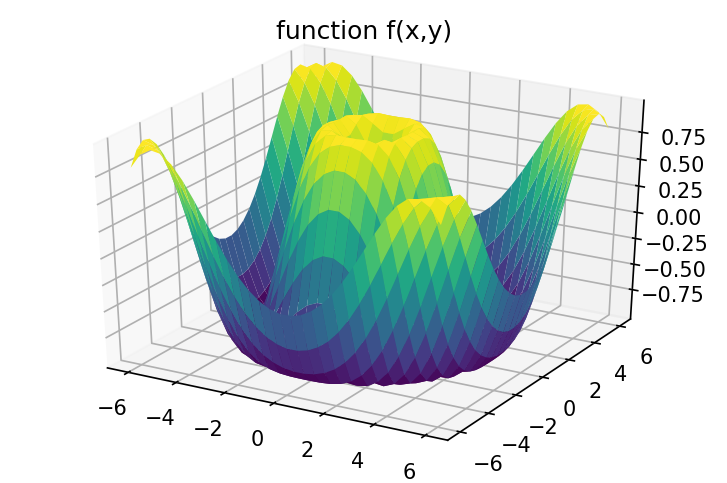

In [176]:
fig=plt.figure(dpi=150)
ax=plt.axes(projection='3d')
ax.set(title='function f(x,y)')
ax.plot_surface(Xa,Ya,Za,cmap='viridis')

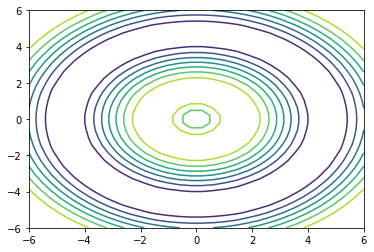

In [177]:
plt.contour(Xa,Ya,Za)

In [5]:
from sklearn.datasets import make_circles

ModuleNotFoundError: No module named 'scipy.io.matlab'

In [6]:
import scipy

In [7]:
scipy.__version__

'1.5.0'

In [56]:
y.replace(['setosa','versicolor','virginica'],[0,1,2],inplace=True)

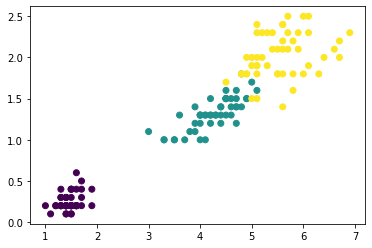

In [76]:
plt.figure()
plt.scatter(X.iloc[:,0],X.iloc[:,1],c=y)

In [102]:
from sklearn.svm import LinearSVC
model=LinearSVC(C=100)

In [103]:
model.fit(X,y)

C:\Users\Acer\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC(C=100)

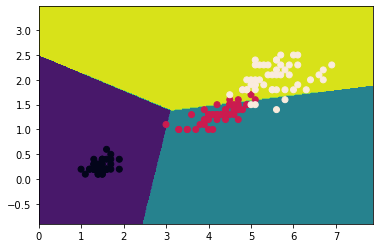

In [112]:
X0_min,X0_max=X.iloc[:,0].min()-1,X.iloc[:,0].max()+1
X1_min,X1_max=X.iloc[:,1].min()-1,X.iloc[:,1].max()+1
x0=np.arange(X0_min,X0_max,0.02)
x1=np.arange(X1_min,X1_max,0.02)
xx,yy=np.meshgrid(x0,x1)
X_new=np.c_[xx.reshape(-1),yy.reshape(-1)]
y_new=model.predict(X_new)
zz=y_new.reshape(xx.shape)
plt.contourf(xx,yy,zz)
plt.scatter(X.iloc[:,0],X.iloc[:,1],c=y,cmap='rocket',label=True);

In [5]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators=500)
X=iris.iloc[:,:-1].values
y=iris.iloc[:,-1].values
rnd_clf.fit(X,y)
rnd_clf.feature_importances_

In [79]:
X=iris.iloc[:,[0,2,3]].values
y=iris.iloc[:,-1]

In [80]:
y=y.replace(y.unique(),[0,1,1])

In [111]:
%matplotlib inline

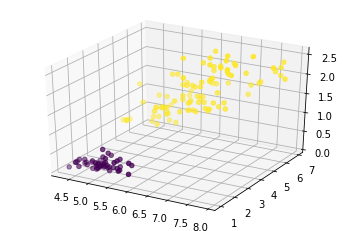

In [81]:
fig=plt.figure()
ax=plt.axes(projection='3d')
ax.scatter3D(X[:,0],X[:,1],X[:,2],c=y);

In [104]:
model.fit(X,y)

C:\Users\Acer\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC(C=100)

In [105]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    1
146    1
147    1
148    1
149    1
Name: species, Length: 150, dtype: int64

In [84]:
model.coef_

array([[-0.5364537 ,  0.98179789,  0.61577718]])

In [85]:
model.intercept_

array([-0.17911952])

In [98]:
def f(m,x,y):
    return (-(m.coef_[0,0]*x)-(m.coef_[0,1]*y)-m.intercept_[0])/m.coef_[0,2]

In [87]:
xx,yy=np.meshgrid(np.arange(0,10),np.arange(0,10))

In [95]:
from sklearn.linear_model import LogisticRegression
model1=LogisticRegression()

In [96]:
model1.fit(X,y)

LogisticRegression()

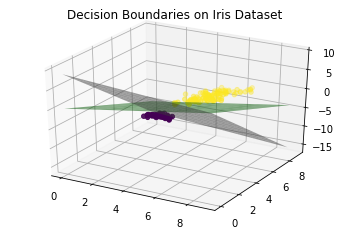

In [122]:
ax=plt.axes(projection='3d')
z=f(model,xx,yy)
zz=f(model1,xx,yy)
ax.plot_surface(xx,yy,z,color='green',alpha=0.5)
ax.plot_surface(xx,yy,zz,color='grey',alpha=0.5)
ax.scatter3D(X[:,0],X[:,1],X[:,2],c=y,cmap='viridis')
ax.set(title='Decision Boundaries on Iris Dataset');

### Grid Search CV for SVM kernel hyperparameters

In [3]:
iris=sns.load_dataset('iris')

In [4]:
data=iris[iris['species']!='setosa'].iloc[:,[2,3,-1]]

In [5]:
X=data.iloc[:,[0,1]]

In [6]:
y=data.iloc[:,-1]

In [7]:
y=y.replace(y.unique(),[0,1])

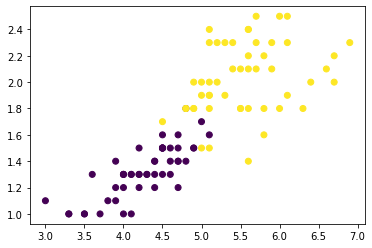

In [8]:
plt.scatter(X.iloc[:,0],X.iloc[:,1],c=y);

In [121]:
from sklearn.svm import SVC
model=SVC(kernel='linear',probability=True,C=1)

In [122]:
model.fit(Xtrain,ytrain)

SVC(C=1, kernel='linear', probability=True)

In [123]:
y_pred=model.predict(Xtest)
accuracy_score(ytest,y_pred),f1_score(ytest,y_pred)

(0.9333333333333333, 0.9230769230769231)

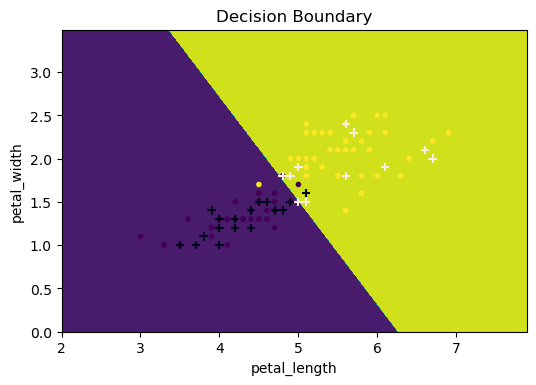

In [124]:
fig,ax=plt.subplots(dpi=100)
decision_boundary(ax,model,Xtrain,ytrain)
ax.scatter(Xtest.iloc[:,0],Xtest.iloc[:,1],marker='+',c=ytest,cmap='rocket')

In [74]:
from sklearn.linear_model import LogisticRegression
m=LogisticRegression()

In [75]:
m.fit(Xtrain,ytrain)

LogisticRegression()

In [76]:
y_pred=m.predict(Xtest)
accuracy_score(ytest,y_pred),f1_score(ytest,y_pred)

(0.8666666666666667, 0.8333333333333333)

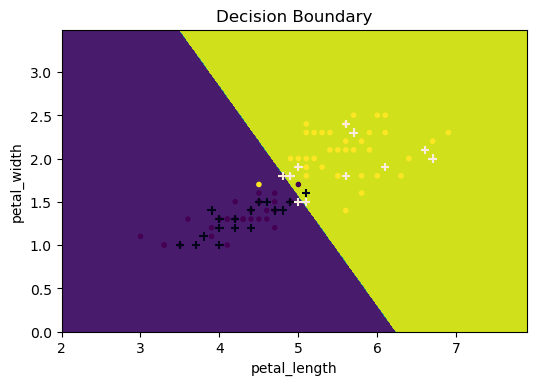

In [77]:
fig,ax=plt.subplots(dpi=100)
decision_boundary(ax,m,Xtrain,ytrain)
ax.scatter(Xtest.iloc[:,0],Xtest.iloc[:,1],marker='+',c=ytest,cmap='rocket')

In [11]:
a_min,a_max=X.iloc[:,0].min()-1,X.iloc[:,0].max()+1
b_min,b_max=X.iloc[:,1].min()-1,X.iloc[:,1].max()+1

x=np.arange(a_min,a_max,0.01)
y1=np.arange(b_min,b_max,0.01)
xx,yy=np.meshgrid(x,y1)

X_2d=np.c_[xx.reshape(-1),yy.reshape(-1)]
y_2d=model.predict(X_2d)

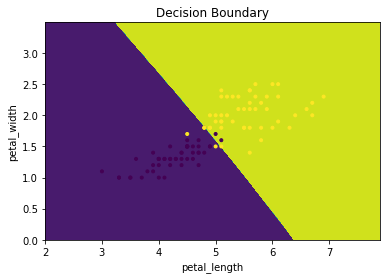

In [12]:
fig=plt.figure()
ax=plt.axes()
z=y_2d.reshape(xx.shape)
ax.contourf(xx,yy,z)
ax.scatter(X.iloc[:,0],X.iloc[:,1],marker='.',c=y)
ax.set(title='Decision Boundary', xlabel='petal_length', ylabel='petal_width');

### Bagging and Pasting

In [13]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(max_depth=2)

In [14]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.3,random_state=42)

In [41]:
def decision_boundary(ax,model,X,y):
    a_min,a_max=X.iloc[:,0].min()-1,X.iloc[:,0].max()+1
    b_min,b_max=X.iloc[:,1].min()-1,X.iloc[:,1].max()+1

    x=np.arange(a_min,a_max,0.01)
    y1=np.arange(b_min,b_max,0.01)
    xx,yy=np.meshgrid(x,y1)

    X_2d=np.c_[xx.reshape(-1),yy.reshape(-1)]
    y_2d=model.predict(X_2d)
    
    z=y_2d.reshape(xx.shape)
    ax.contourf(xx,yy,z,alpha=0.75)
    ax.scatter(X.iloc[:,0],X.iloc[:,1],marker='.',c=y)
    ax.set(title='Decision Boundary', xlabel='petal_length', ylabel='petal_width');
    return ax

In [16]:
model.fit(Xtrain,ytrain)

DecisionTreeClassifier(max_depth=2)

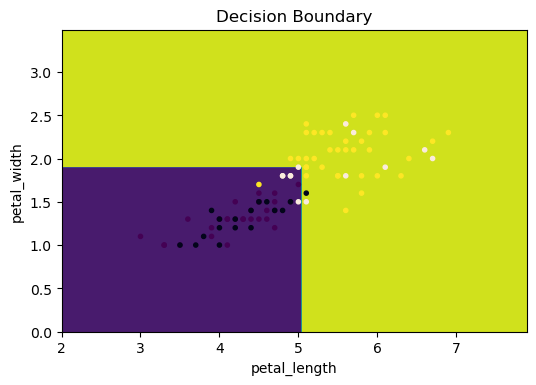

In [17]:
fig=plt.figure(dpi=100)
ax=plt.axes()
decision_boundary(ax,model,Xtrain,ytrain)
ax.scatter(Xtest.iloc[:,0],Xtest.iloc[:,1],marker='.',c=ytest,cmap='rocket');

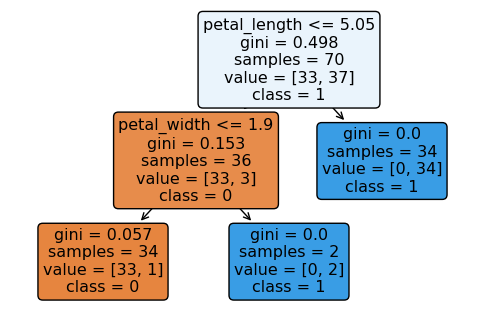

In [18]:
from sklearn import tree
plt.subplots(dpi=100)
tree.plot_tree(model,feature_names = X.columns,class_names=['0','1'],rounded=True,filled = True);

In [19]:
from sklearn.metrics import accuracy_score,f1_score

In [20]:
y_pred=model.predict(Xtest)
f1_score(ytest,y_pred)

0.6666666666666667

In [21]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [22]:
bag_clf=BaggingClassifier(DecisionTreeClassifier(),n_estimators=70,bootstrap=True,oob_score=True)

In [23]:
bag_clf.fit(Xtrain,ytrain)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=70,
                  oob_score=True)

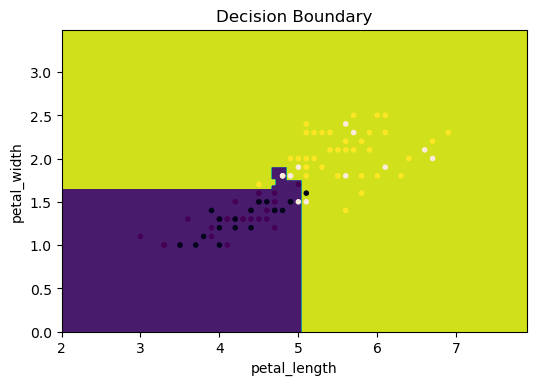

In [24]:
fig,ax=plt.subplots(dpi=100)
decision_boundary(ax,bag_clf,Xtrain,ytrain)
ax.scatter(Xtest.iloc[:,0],Xtest.iloc[:,1],marker='.',c=ytest,cmap='rocket');

In [25]:
y_pred=bag_clf.predict(Xtest)

In [26]:
f1_score(ytest,y_pred)

0.8333333333333333

In [27]:
bag_clf.oob_score_

0.9428571428571428

In [28]:
BaggingClassifier?

In [29]:
DecisionTreeClassifier?

## Random Forests

In [106]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rnd_clf=RandomForestClassifier(random_state=42,max_depth=1,n_estimators=100,n_jobs=-1)
#para_grid=[{'n_estimators':[100,500,750,1000],'max_samples':[None,0.75,0.9],'max_depth':[1,2,5,7]}]

In [107]:
#grid_model=GridSearchCV(rnd_clf,para_grid,cv=5,n_jobs=-1)

In [108]:
rnd_clf.fit(Xtrain,ytrain) #grid_model.fit(Xtrain,ytrain)

RandomForestClassifier(max_depth=1, n_jobs=-1, random_state=42)

In [96]:
#grid_model.best_params_

In [97]:
#grid_model.cv_results_

In [98]:
#clf=grid_model.best_estimator_

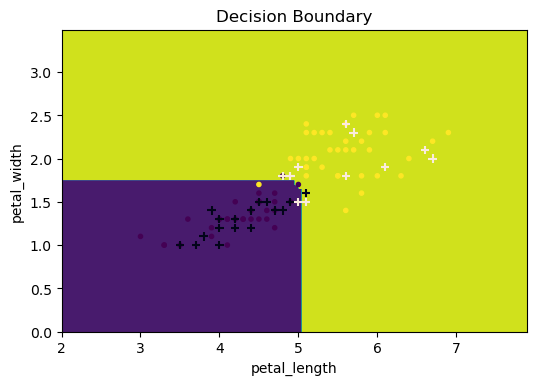

In [109]:
fig,ax=plt.subplots(dpi=100)
decision_boundary(ax,rnd_clf,Xtrain,ytrain)
ax.scatter(Xtest.iloc[:,0],Xtest.iloc[:,1],marker='+',c=ytest,cmap='rocket')

In [136]:
y_pred=rnd_clf.predict(Xtest)
accuracy_score(y_pred,ytest),f1_score(y_pred,ytest)

(0.9333333333333333, 0.9230769230769231)

In [131]:
from sklearn.model_selection import cross_val_score
acc=cross_val_score(rnd_clf,Xtrain,ytrain,cv=5)
acc.mean()

0.9571428571428571

In [125]:
from sklearn.ensemble import VotingClassifier
vito=VotingClassifier(estimators=[('log_reg',m),('svm',model),('random_forest',rnd_clf)],voting='soft')

In [126]:
vito.fit(Xtrain,ytrain)

VotingClassifier(estimators=[('log_reg', LogisticRegression()),
                             ('svm',
                              SVC(C=1, kernel='linear', probability=True)),
                             ('random_forest',
                              RandomForestClassifier(max_depth=1, n_jobs=-1,
                                                     random_state=42))],
                 voting='soft')

In [127]:
y_pred=vito.predict(Xtest)
accuracy_score(y_pred,ytest),f1_score(y_pred,ytest)

(0.9333333333333333, 0.9230769230769231)

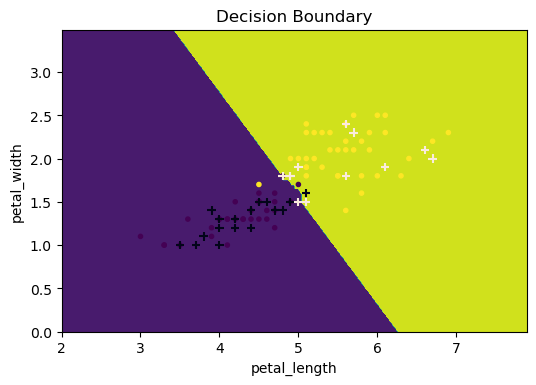

In [129]:
fig,ax=plt.subplots(dpi=100)
decision_boundary(ax,vito,Xtrain,ytrain)
ax.scatter(Xtest.iloc[:,0],Xtest.iloc[:,1],marker='+',c=ytest,cmap='rocket')

## Adaboost

In [165]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),n_estimators=2)

In [166]:
ada.fit(Xtrain,ytrain)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   n_estimators=2)

In [167]:
y_pred=ada.predict(Xtest)
accuracy_score(y_pred,ytest),f1_score(y_pred,ytest)

(0.9333333333333333, 0.9230769230769231)

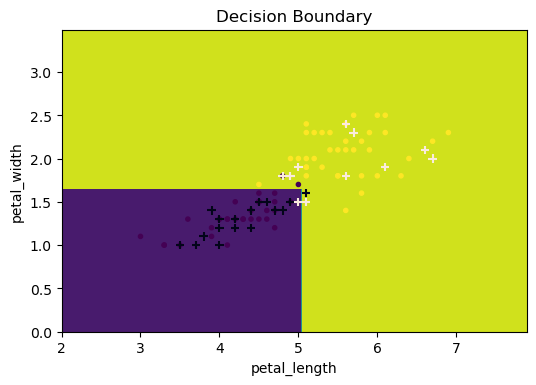

In [168]:
fig,ax=plt.subplots(dpi=100)
decision_boundary(ax,ada,Xtrain,ytrain)
ax.scatter(Xtest.iloc[:,0],Xtest.iloc[:,1],marker='+',c=ytest,cmap='rocket')

## Gradient Boost

In [6]:
from sklearn.ensemble import GradientBoostingRegressor
grd=GradientBoostingRegressor()

In [7]:
GradientBoostingRegressor?

In [59]:
a=np.arange(0,10,0.1)
b=(a-5)**2+(np.round((np.random.randn(a.shape[0])%3)-3,3))

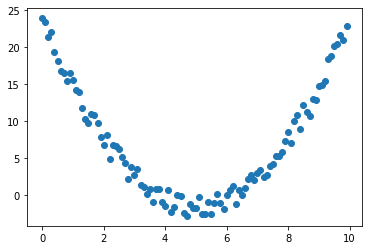

In [60]:
plt.scatter(a,b)

In [63]:
X=a.reshape(-1,1)

In [79]:
y=b

In [410]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.3)

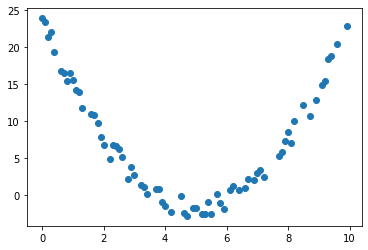

In [411]:
plt.scatter(Xtrain,ytrain)

In [413]:
from sklearn.ensemble import GradientBoostingRegressor
grd=GradientBoostingRegressor(max_depth=2,n_estimators=51)

In [414]:
grd.fit(Xtrain,ytrain)

GradientBoostingRegressor(max_depth=2, n_estimators=51)

In [393]:
class PlotDecisionTreeSplit:    
    temp=pd.DataFrame(columns=['X','y'])
    def __init__(self,model,Xtrain,ytrain):
        y_pred=model.predict(Xtrain)
        df=pd.DataFrame({'X':Xtrain.reshape(-1),'y':y_pred})
        df.sort_values('X',inplace=True)
        self.storeX=df.iloc[0,0]
        self.storey=df.iloc[0,1]
        df.apply(self.corner_points,axis=1);
        self.plot();
    def corner_points(self,row):
        if (row['X']!=self.storeX and row['y']!=self.storey):
            self.temp=pd.concat([self.temp,pd.DataFrame(np.c_[[self.storeX,row['X']],[row['y'],row['y']]],columns=['X','y'])],axis=0)
        else:
            self.temp=pd.concat([self.temp,pd.DataFrame(row).T],axis=0)
        self.storeX,self.storey=row['X'],row['y']
    def plot(self):
        ax=plt.axes()
        ax.scatter(Xtrain,ytrain,marker='.')
        ax.plot(self.temp['X'],self.temp['y'],color='red')
        return ax        

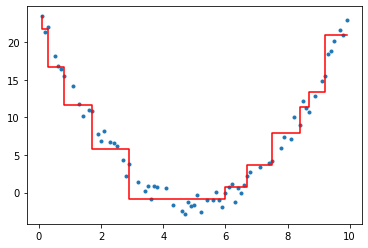

In [399]:
PlotDecisionTreeSplit(grd,Xtrain,ytrain);

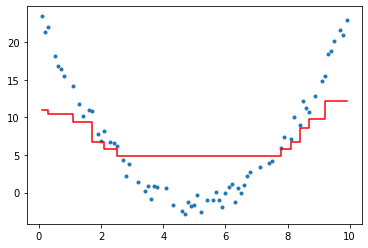

In [402]:
PlotDecisionTreeSplit(grd,Xtrain,ytrain);

In [415]:
y_pred=grd.predict(Xtest)

In [416]:
from sklearn.metrics import mean_squared_error
mean_squared_error(ytest,y_pred)

1.423845188362857

In [403]:
# Implementing early stopping
for number in range(1,120):
    grd=GradientBoostingRegressor(max_depth=2,n_estimators=number)
    grd.fit(Xtrain,ytrain)
    y_pred=grd.predict(Xtest)
    mse=mean_squared_error(ytest,y_pred)
    if number==1:
        least_error=mse
        best_grd=grd
    elif mse<least_error:
        least_error=mse
        best_grd=grd

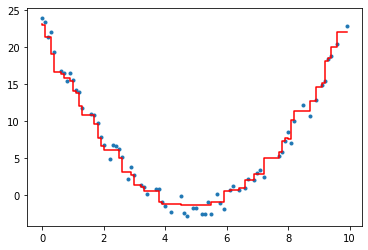

In [417]:
# grd=best_grd
PlotDecisionTreeSplit(grd,Xtrain,ytrain)

In [406]:
least_error

1.879973380352318

In [409]:
import xgboost

In [460]:
xgb=xgboost.XGBRegressor(n_estimators=13)
xgb.fit(Xtrain,ytrain)
y_pred=xgb.predict(Xtest)

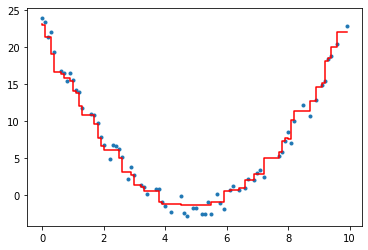

In [461]:
PlotDecisionTreeSplit(grd,Xtrain,ytrain)

In [462]:
mean_squared_error(ytest,y_pred)

1.6495109489404411

In [423]:
xgb.fit(Xtrain,ytrain,eval_set=[(Xtest,ytest)],early_stopping_rounds=2)

[0]	validation_0-rmse:6.80548
[1]	validation_0-rmse:5.19270
[2]	validation_0-rmse:4.02417
[3]	validation_0-rmse:3.13212
[4]	validation_0-rmse:2.53501
[5]	validation_0-rmse:2.15636
[6]	validation_0-rmse:1.85836
[7]	validation_0-rmse:1.62136
[8]	validation_0-rmse:1.47830
[9]	validation_0-rmse:1.38948
[10]	validation_0-rmse:1.32500
[11]	validation_0-rmse:1.30187
[12]	validation_0-rmse:1.28433
[13]	validation_0-rmse:1.29325


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [429]:
xgb.best_ntree_limit

13

In [431]:
xgboost.XGBRegressor?

In [467]:
from sklearn.model_selection import RandomizedSearchCV

# Unsupervised Learning

## K Means Clustering

In [3]:
X=pd.read_csv('data/clusters.csv')

In [4]:
from sklearn.cluster import KMeans
k=4
kmeans=KMeans(n_clusters=k)

In [5]:
y=kmeans.fit_predict(X)

In [6]:
X.drop(X.columns[0],axis=1,inplace=True)

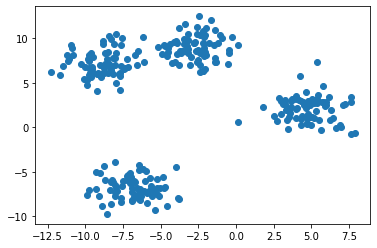

In [7]:
plt.scatter(X.iloc[:,0],X.iloc[:,1])

In [8]:
y=kmeans.fit_predict(X)

In [9]:
y

array([0, 0, 1, 2, 0, 2, 3, 2, 1, 3, 1, 3, 1, 1, 0, 1, 0, 3, 1, 1, 3, 1,
       2, 0, 1, 0, 0, 2, 2, 3, 1, 3, 0, 3, 0, 1, 0, 2, 0, 2, 3, 1, 0, 2,
       1, 1, 0, 3, 0, 3, 2, 0, 2, 1, 2, 3, 0, 3, 3, 1, 0, 3, 3, 1, 2, 2,
       2, 2, 2, 1, 2, 2, 0, 3, 1, 0, 2, 2, 1, 2, 1, 1, 0, 1, 2, 0, 0, 3,
       3, 3, 0, 1, 0, 1, 1, 0, 2, 1, 0, 0, 3, 3, 3, 1, 1, 1, 1, 1, 2, 0,
       3, 1, 1, 1, 1, 3, 0, 2, 0, 2, 2, 2, 1, 0, 2, 0, 0, 1, 0, 2, 3, 1,
       1, 1, 1, 3, 3, 0, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 2, 1, 1, 0, 3, 2,
       1, 3, 2, 0, 0, 3, 1, 0, 2, 0, 3, 0, 2, 1, 1, 1, 1, 1, 2, 3, 3, 2,
       2, 3, 3, 2, 0, 1, 0, 3, 3, 0, 2, 1, 3, 3, 2, 2, 2, 0, 3, 2, 2, 3,
       3, 0, 1, 1, 2, 3, 1, 2, 2, 0, 2, 1, 1, 2, 2, 3, 0, 2, 0, 0, 1, 0,
       0, 2, 0, 2, 3, 3, 0, 0, 3, 3, 3, 0, 1, 2, 3, 2, 0, 3, 0, 0, 0, 2,
       2, 3, 0, 2, 2, 2, 0, 2, 0, 2, 0, 3, 2, 0, 3, 1, 0, 1, 3, 1, 0, 1,
       2, 3, 2, 3, 3, 1, 1, 2, 3, 3, 0, 0, 2, 1, 1, 3, 3, 3, 3, 2, 0, 3,
       2, 3, 3, 2, 1, 2, 3, 1, 0, 1, 3, 1, 0, 0])

In [10]:
C=kmeans.cluster_centers_

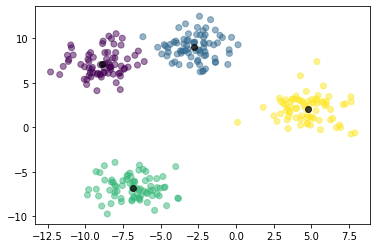

In [11]:
plt.scatter(X.iloc[:,0],X.iloc[:,1],c=y,cmap='viridis',alpha=0.5)
plt.scatter(C[:,0],C[:,1],color='black',alpha=0.75)

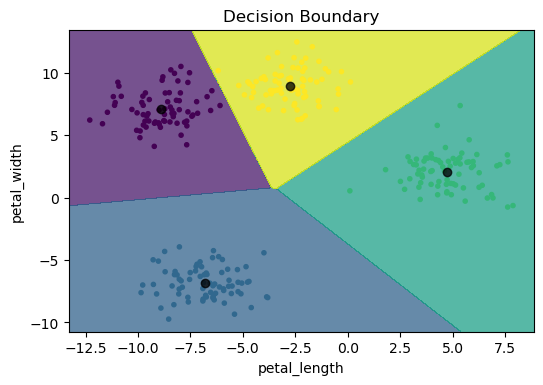

In [48]:
fig,ax=plt.subplots(dpi=100)
decision_boundary(ax,kmeans,X,y)
plt.scatter(C[:,0],C[:,1],color='black',alpha=0.75)

In [47]:
kmeans.cluster_centers_

array([[-8.88766996,  7.11500763],
       [-6.813442  , -6.81059664],
       [ 4.74953532,  2.06924759],
       [-2.75674564,  8.963191  ]])

In [12]:
kmeans.labels_

array([0, 0, 1, 2, 0, 2, 3, 2, 1, 3, 1, 3, 1, 1, 0, 1, 0, 3, 1, 1, 3, 1,
       2, 0, 1, 0, 0, 2, 2, 3, 1, 3, 0, 3, 0, 1, 0, 2, 0, 2, 3, 1, 0, 2,
       1, 1, 0, 3, 0, 3, 2, 0, 2, 1, 2, 3, 0, 3, 3, 1, 0, 3, 3, 1, 2, 2,
       2, 2, 2, 1, 2, 2, 0, 3, 1, 0, 2, 2, 1, 2, 1, 1, 0, 1, 2, 0, 0, 3,
       3, 3, 0, 1, 0, 1, 1, 0, 2, 1, 0, 0, 3, 3, 3, 1, 1, 1, 1, 1, 2, 0,
       3, 1, 1, 1, 1, 3, 0, 2, 0, 2, 2, 2, 1, 0, 2, 0, 0, 1, 0, 2, 3, 1,
       1, 1, 1, 3, 3, 0, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 2, 1, 1, 0, 3, 2,
       1, 3, 2, 0, 0, 3, 1, 0, 2, 0, 3, 0, 2, 1, 1, 1, 1, 1, 2, 3, 3, 2,
       2, 3, 3, 2, 0, 1, 0, 3, 3, 0, 2, 1, 3, 3, 2, 2, 2, 0, 3, 2, 2, 3,
       3, 0, 1, 1, 2, 3, 1, 2, 2, 0, 2, 1, 1, 2, 2, 3, 0, 2, 0, 0, 1, 0,
       0, 2, 0, 2, 3, 3, 0, 0, 3, 3, 3, 0, 1, 2, 3, 2, 0, 3, 0, 0, 0, 2,
       2, 3, 0, 2, 2, 2, 0, 2, 0, 2, 0, 3, 2, 0, 3, 1, 0, 1, 3, 1, 0, 1,
       2, 3, 2, 3, 3, 1, 1, 2, 3, 3, 0, 0, 2, 1, 1, 3, 3, 3, 3, 2, 0, 3,
       2, 3, 3, 2, 1, 2, 3, 1, 0, 1, 3, 1, 0, 0])

In [14]:
from sklearn.metrics import silhouette_score

In [15]:
silhouette_score(X,kmeans.labels_)

0.7115360194798387

In [26]:
sil_lis=[]
for k in range(2,8):
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(X)
    sil=silhouette_score(X,kmeans.labels_)
    sil_lis+=[sil]

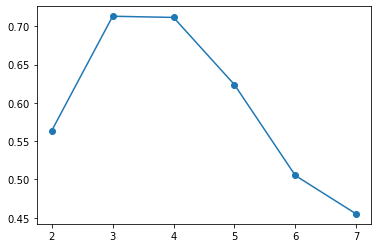

In [28]:
plt.plot(range(2,8),sil_lis,marker='o')

[0.5638908665273666,
 0.7130949154610651,
 0.7115360194798387,
 0.5997317345131133,
 0.5046875933879019,
 0.40794280887430373]

## Image Segmentation using Unsupervised Learning

In [70]:
image=plt.imread(r"C:\Users\Acer\Desktop\food.jpg")

In [71]:
image.shape

(457, 480, 3)

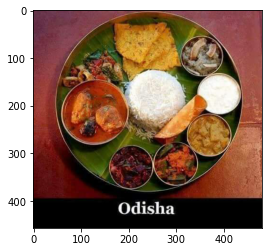

In [72]:
plt.imshow(image)

In [73]:
X=image.reshape(-1,3)

In [209]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=5)
kmeans.fit(X)

KMeans(n_clusters=5)

In [210]:
segmented_img=kmeans.cluster_centers_[kmeans.labels_]

In [229]:
img=segmented_img.round().astype('int')

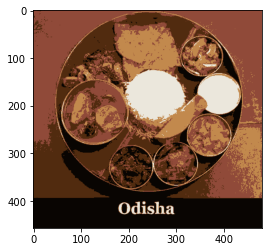

In [212]:
plt.imshow(img.reshape(image.shape))

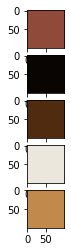

In [218]:
fig,ax=plt.subplots(nrows=np.unique(kmeans.labels_).shape[0],ncols=1)
for label in np.unique(kmeans.labels_):
    yes=img[kmeans.labels_==label].reshape(-1,1,3)[:100]
    big_pixel=np.zeros((100,100,3),dtype='int')
    big_pixel=big_pixel+yes
    ax[label].imshow(big_pixel)

## Using Clustering for Semi-Supervised Learning